# ML Tutorial (Part 1)

Link to tutorial [here](https://developers.redhat.com/articles/2021/05/21/introduction-machine-learning-jupyter-notebooks#using_a_jupyter_notebook_for_machine_learning)

## Step 1: Explore raw data
* Import required Python libraries
* Convert the raw data file (raw-data.csv) to a DataFrame

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('raw-data.csv')
df['time'] = pd.to_datetime(df['ts'], unit='ms')
df.set_index('time', inplace=True)
df.drop(columns=['ts'], inplace=True)

df.tail(5)

,id,value,label
time,,,
2020-04-23 13:19:38.000,pump-2,43.276667,1
2020-04-23 13:19:39.617,pump-1,15.709151,0
2020-04-23 13:19:42.999,pump-2,16.214949,0
2020-04-23 13:19:44.617,pump-1,15.393048,0
2020-04-23 13:19:47.999,pump-2,14.855999,0


* Visualize the DataFrame
* Upper graph: subset of the vibration data
* Lower graph: manually labeled data with anomalies (1 = anomaly, 0 = normal). These are the anomalies that the machine learning model should detect.

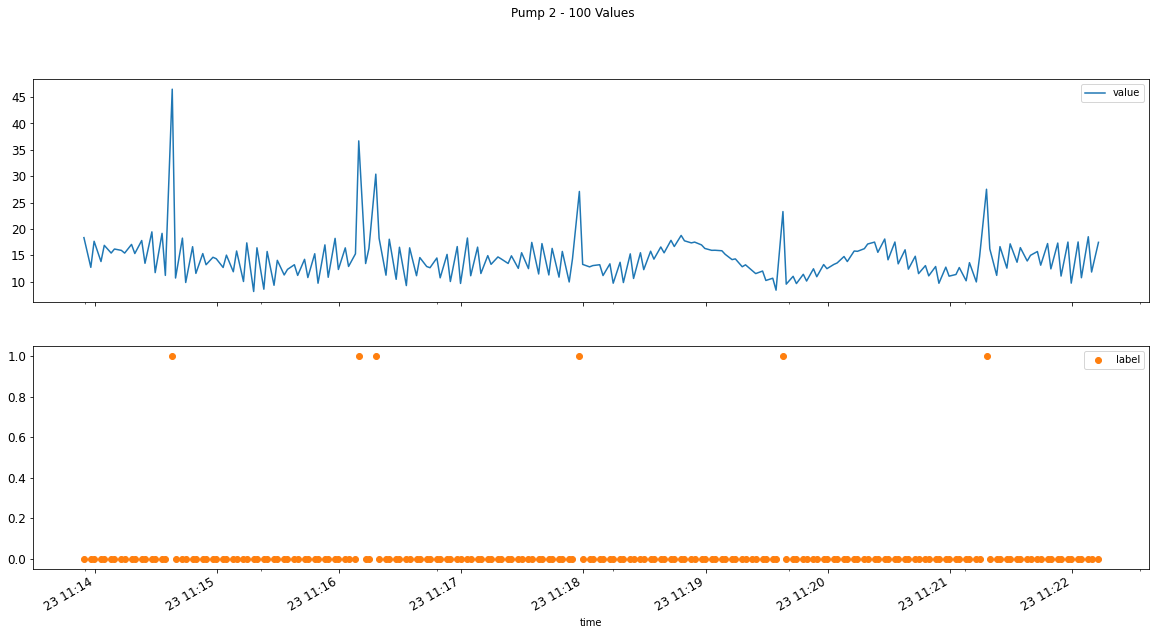

In [9]:
df21 = df.head(200)
df21.plot(figsize=(20,10), fontsize=12, subplots=True, style=["-", "o"], title="Pump 2 - 100 Values")
plt.show()

* Data wrangling/data munging: transform, clean and structure raw data into other formats more suitable for analysis

In [8]:
#
# Few helper functions
#

# Get list with column names: F1, F2, Fn, L
def get_columns(n):
    f = []
    for x in range(1, n+1):
        f.append("F"+str(x))
    f.append("L")
    return f

# Create empty data frame
def create_empty_df(n):
    d=([0.]*n)
    d.append(0)
    dfx = pd.DataFrame([d], columns=get_columns(n))
    dfx.drop(dfx.index[0], inplace=True)
    return dfx

# Create data frame with one row
def create_df(vals: list, label: int = 0):
    if not isinstance(vals, list):
        raise TypeError
    #vals.append(label)
    dfx = pd.DataFrame([vals+[label]], columns=get_columns(len(vals)))
    return dfx

* Convert data into episodes

In [9]:
length = 5  # Episode length

df_eps = create_empty_df(length)

for id in df.id.unique():
    print("Convert data for: ", id)
    
    df2 = df.loc[df['id'] == id]
    
    ep = []
    for index, row in df2.iterrows():
        # print('%6.2f, %d' % (row['value'], row['label']))
        ep.append(row['value'])
        if len(ep) == length:
            df_row = create_df(ep,row['label'])
            df_eps = df_eps.append(df_row, ignore_index=True)
            del(ep[0])

Convert data for:  pump-1
Convert data for:  pump-2


* Episodes of length 6 and the label in the last column

In [10]:
df_eps.tail(10)

,F1,F2,F3,F4,F5,L
3004,9.025419,9.431438,10.135468,12.042551,12.123937,0
3005,9.431438,10.135468,12.042551,12.123937,12.804910,0
3006,10.135468,12.042551,12.123937,12.804910,14.626118,0
3007,12.042551,12.123937,12.804910,14.626118,14.697982,0
3008,12.123937,12.804910,14.626118,14.697982,16.386558,0
3009,12.804910,14.626118,14.697982,16.386558,17.361092,0
3010,14.626118,14.697982,16.386558,17.361092,18.764962,0
3011,14.697982,16.386558,17.361092,18.764962,43.276667,1
3012,16.386558,17.361092,18.764962,43.276667,16.214949,0
3013,17.361092,18.764962,43.276667,16.214949,14.855999,0


    Note: column F5 is the latest data value, where column F1 is the oldest data for a given episode. The label L indicates whether there is an anomaly.
    
The data is now ready for supervised learning.